This time series project contains the below topics

1. Simple Moving Average(SMA)
2. Cumulative Moving Average(CMA)
3. Exponential Weight Moving Average(EWMA)
4. Moving Average Formula(ACF, MA)
5. Autoregressive Model(PACF, AR)

In [1]:
#import all libraries and modules
import pandas_datareader as pdr
import pandas as pd
from   datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import yfinance as yf

# Define the ticker symbol (e.g., TSLA for Tesla)
ticker_symbol = "TSLA"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Get historical data
tesla = ticker.history(period="1y")

# You can specify different periods, such as "1d" for one day, "1mo" for one month, "1y" for one year, and more.

# Print the historical data
print(tesla)

                                 Open        High         Low       Close  \
Date                                                                        
2022-10-26 00:00:00-04:00  219.399994  230.600006  218.199997  224.639999   
2022-10-27 00:00:00-04:00  229.770004  233.809998  222.850006  225.089996   
2022-10-28 00:00:00-04:00  225.399994  228.860001  216.350006  228.520004   
2022-10-31 00:00:00-04:00  226.190002  229.850006  221.940002  227.539993   
2022-11-01 00:00:00-04:00  234.050003  237.399994  227.279999  227.820007   
...                               ...         ...         ...         ...   
2023-10-19 00:00:00-04:00  225.949997  230.610001  216.779999  220.110001   
2023-10-20 00:00:00-04:00  217.009995  218.860001  210.419998  211.990005   
2023-10-23 00:00:00-04:00  210.000000  216.979996  202.509995  212.080002   
2023-10-24 00:00:00-04:00  216.500000  222.050003  214.110001  216.520004   
2023-10-25 00:00:00-04:00  215.880005  220.100006  212.199997  212.419998   

<Axes: xlabel='Date'>

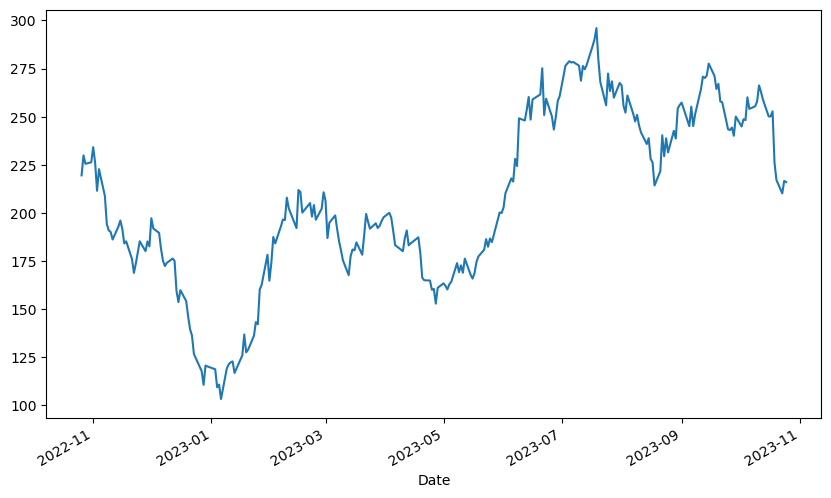

In [5]:
#1. Simple Moving Average
tesla['Open'].plot(figsize = (10, 6))

In [6]:
#wherever 5 window is not available, it will take the max available window, 1, 2, 3 etc 
#use rolling() for RMA
tesla['10_days_rolling'] = tesla['Open'].rolling(window = 10, min_periods = 1).mean()
tesla['30_days_rolling'] = tesla['Open'].rolling(window = 30, min_periods = 1).mean()
tesla['50_days_rolling'] = tesla['Open'].rolling(window = 50, min_periods = 1).mean()

<Axes: xlabel='Date'>

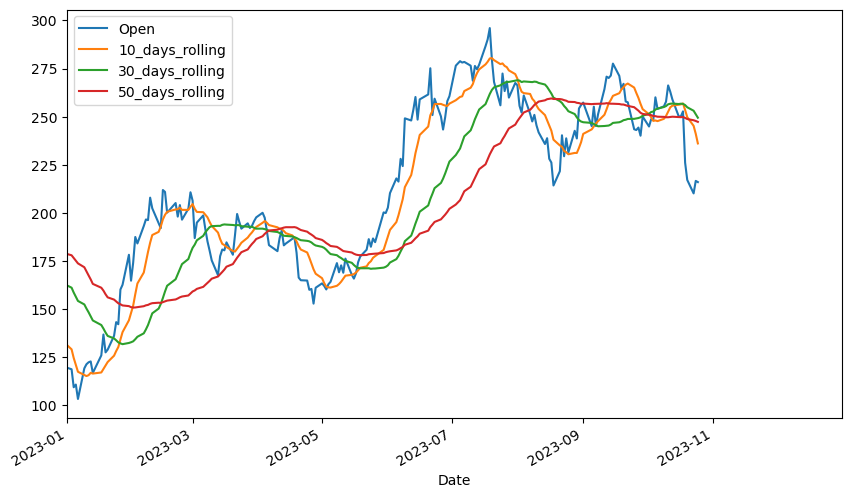

In [11]:
#to make the charts bit clearer, we take a shorter date range
tesla[['Open', '10_days_rolling', '30_days_rolling', '50_days_rolling']].plot(figsize = (10, 6), xlim = ['2023', '2024'])

In [12]:
#Disadvantages of SMA:
# Similar importance to all the data

#2. Cumulative moving average(use expaning() for CMA)
tesla['cumulative_moving_average'] = tesla['Open'].expanding().mean()

<Axes: xlabel='Date'>

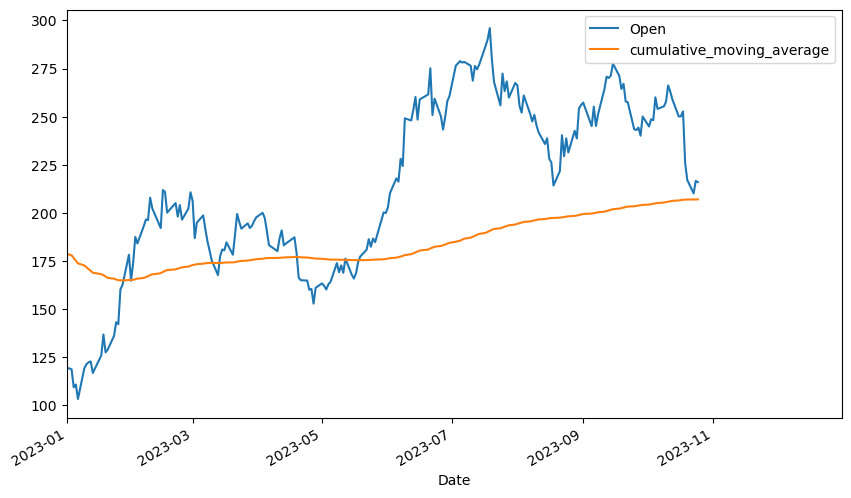

In [13]:
#plot cumulative moving average
tesla[['Open', 'cumulative_moving_average']].plot(figsize = (10, 6), xlim = ['2023', '2024'])

In [15]:
#write a dataframe to a csv  
tesla.to_csv('/Users/saisisir/Downloads/Sisir Entain Laptop/Self Learning /Machine Learning/Kaggle Practice/'
'17. Time Series Analysis/tesla_data.csv')

<Axes: xlabel='Date'>

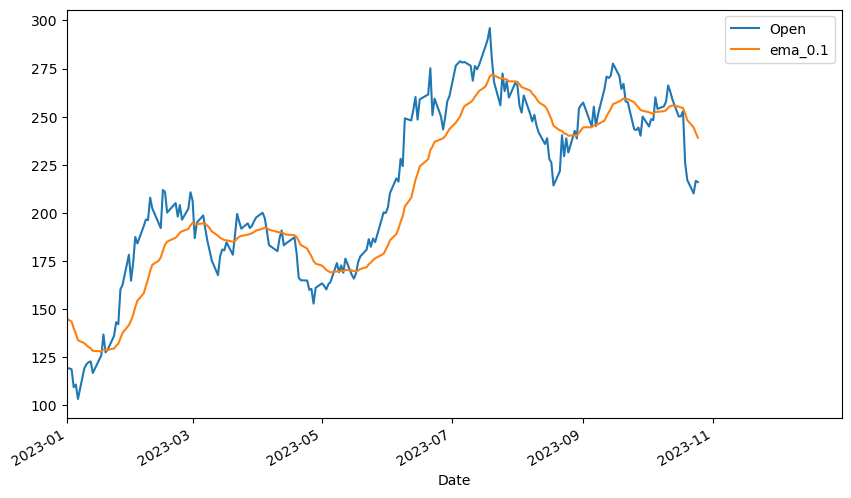

In [16]:
#3. Exponential Moving Average(EMA)

#smoothing_factor = 0.1
tesla['ema_0.1'] = tesla['Open'].ewm(alpha = 0.1, adjust = False).mean()
tesla[['Open', 'ema_0.1']].plot(figsize = (10, 6), xlim = ['2023', '2024'])

<Axes: xlabel='Date'>

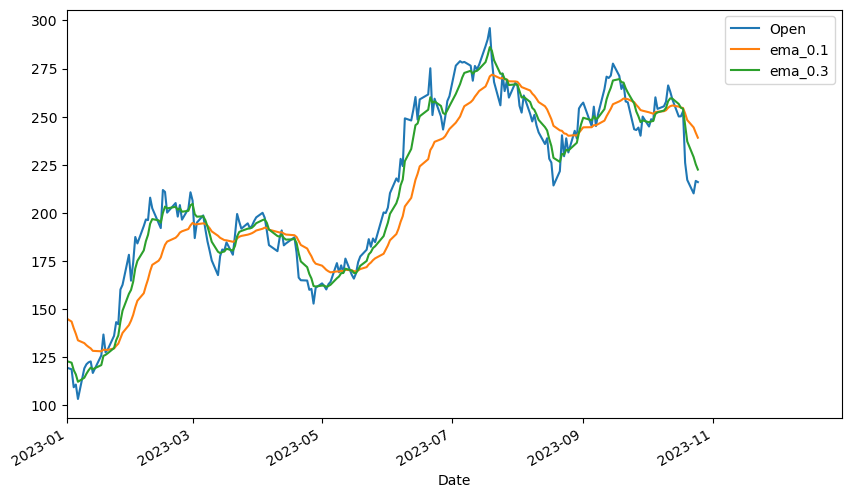

In [17]:
#smoothing_factor = 0.3
tesla['ema_0.3'] = tesla['Open'].ewm(alpha = 0.3, adjust = False).mean()
tesla[['Open', 'ema_0.1', 'ema_0.3']].plot(figsize = (10, 6), xlim = ['2023', '2024'])